<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/8D8uDf).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [1]:
import numpy as np
import pandas as pd

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [2]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше.**

**<font color='red'>Варианты:</font>**
- **45530 женщин и 24470 мужчин**
- 45530 мужчин и 24470 женщин
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин

In [14]:
print(df[df['gender'] == 2]['height'].mean())
print(df[df['gender'] == 1]['height'].mean())

169.947895382
161.355611685


In [9]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем чаще указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- женщины
- **мужчины**

In [11]:
df[df['alco'] == 1]['gender'].value_counts()

2    2603
1    1161
Name: gender, dtype: int64

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- **12**
- 16

In [19]:
smoke_ct = pd.crosstab(df['gender'], df['smoke']).apply(lambda r: r/r.sum(), axis=1)
smoke_ct

smoke,0,1
gender,,
1,0.982144,0.017856
2,0.781120,0.218880


In [26]:
smoke_ct[1][2]/smoke_ct[1][1]

12.257833097333833

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чем здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

Возраст измеряется в днях

**<font color='red'>Варианты:</font>**
- 5
- 10
- 15
- **20**

In [33]:
(df[df['smoke']==1]['age'].median() - df[df['smoke']==0]['age'].median())/30

-19.9

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='../../img/SCORE2007.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Посчитайте признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет: первая с верхним артериальным давлением меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- **3**
- 4
- 5

In [36]:
df['age_years'] = df['age']//365

In [39]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [72]:
do = df[(60 <= df.age_years) & (df.age_years<=64)]
do = do[(do.smoke == 1) & (do.gender == 2)]
feed = {1:4, 2:5, 3:8}
do['cholesterol'] = do.cholesterol.map(feed)
do.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
52,23388,2,162,72.0,130,80,4,1,1,0,1,1,64
90,22099,2,171,97.0,150,100,8,1,1,0,1,1,60
248,22671,2,174,74.0,130,80,8,1,1,0,1,1,62
318,23376,2,175,75.0,180,100,8,1,1,1,1,1,64
410,22415,2,173,70.0,130,70,5,1,1,1,1,0,61


In [60]:
len(do[(do.ap_hi == 180) & (do.cholesterol == 8)])

40

In [73]:
percent_high = len(do[(do.cardio == 1) & (do.ap_hi < 180) & (do.ap_hi >= 160) & (do.cholesterol == 8)])/len(do[(do.ap_hi < 180) & (do.ap_hi >= 160) & (do.cholesterol == 8)])

percent_lower = len(do[(do.cardio == 1) & (do.ap_hi < 120) & (do.cholesterol == 4)]) / len(do[(do.ap_hi < 120) & (do.cholesterol == 4)]) 

In [74]:
percent_high/ percent_lower

3.36

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке лежит в пределах нормы
- **У женщин в среднем BMI выше, чем у мужчин**
- У здоровых в среднем BMI выше, чем у больных
- **В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин**

In [81]:
df['BMI'] = df['weight']/(df['height']/100)**2
print(df['BMI'].median())
print(df[df['gender'] == 1]['BMI'].mean() - df[df['gender'] == 2]['BMI'].mean())
print(df[df['cardio'] == 0]['BMI'].mean() - df[df['cardio'] == 1]['BMI'].mean())
print(df[(df['cardio'] == 0) & (df['alco'] == 0) & (df['gender'] == 2)]['BMI'].mean())
print(df[(df['cardio'] == 0) & (df['alco'] == 0) & (df['gender'] == 1)]['BMI'].mean())

26.374068120774975
1.23314108454
-2.01788542022
25.8726380755
26.8454065941


**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- **10**
- 11

In [106]:
cp = df[df['ap_lo'] <= df['ap_hi']]

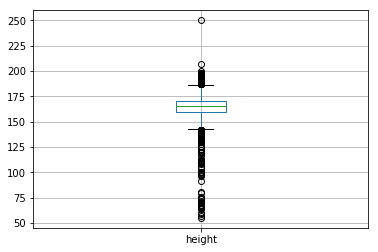

In [123]:
import matplotlib
df.boxplot(column='height')
matplotlib.pyplot.show()

In [107]:
cp = cp[(cp.height >= (cp['height'].quantile(q=0.025))) &( cp.height <= (cp['height'].quantile(q=0.975)))]

In [108]:
cp = cp[(cp.weight >= (cp['weight'].quantile(q=0.025))) &( cp.weight <= (cp['weight'].quantile(q=0.975)))]

In [110]:
1 - len(cp)/len(df)

0.10308571428571434